In [20]:
import numpy as np
import pandas as pd
import glob
from os.path import splitext, basename
from scipy.stats import linregress
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

# Purpose

The figure shows the increase of followers compared to the company/industry size (extrapolated by the sum of all the employees on LinkedIn) over time

In [2]:
df = pd.read_csv('../data/section_3/temp_datalab_records_linkedin_company.csv')
df['as_of_date'] = pd.to_datetime(df.as_of_date)
df = df.dropna(subset=['industry'])

/anaconda3/envs/tdi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def replace_and(x):
    """
    if & or &amp; in value, replace it with /
    """
    replace_list = ['&amp;','/amp;','&']
    for i in replace_list:
        if i in x:
            y = x.replace(i, '/')
            break
        else:
            y = x
    return y

In [4]:
df['industry'] = df.industry.apply(lambda x: replace_and(x))

In [5]:
df.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation / Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop_duplicates(subset='company_name', keep='last', inplace=False)

In [41]:
grouped = df.groupby('industry')[['employees_on_platform', 'followers_count']].sum().reset_index()
grouped1 = grouped.sort_values('employees_on_platform', ascending=False)
grouped2 = grouped.sort_values('followers_count', ascending=False)

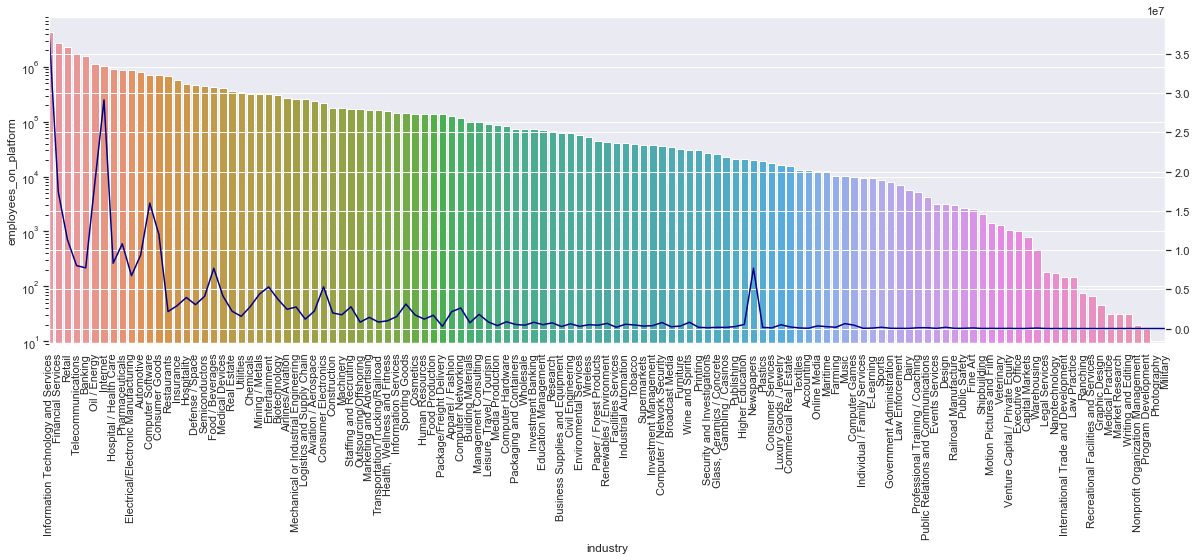

In [53]:
# fig, ax = plt.subplots(figsize=(10,6))
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.barplot(x='industry', y='employees_on_platform', data=grouped1)
ax2 = ax.twinx()
grouped1.plot(x="industry", y="followers_count", ax=ax2, legend=False, color="darkblue")
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(yscale="log")
# ax2.set(yscale='log')
fig =  ax.get_figure()
# fig.savefig("../result/bar_employees_line_followers.png", transparent=True, dpi=300, bbox_inches='tight')

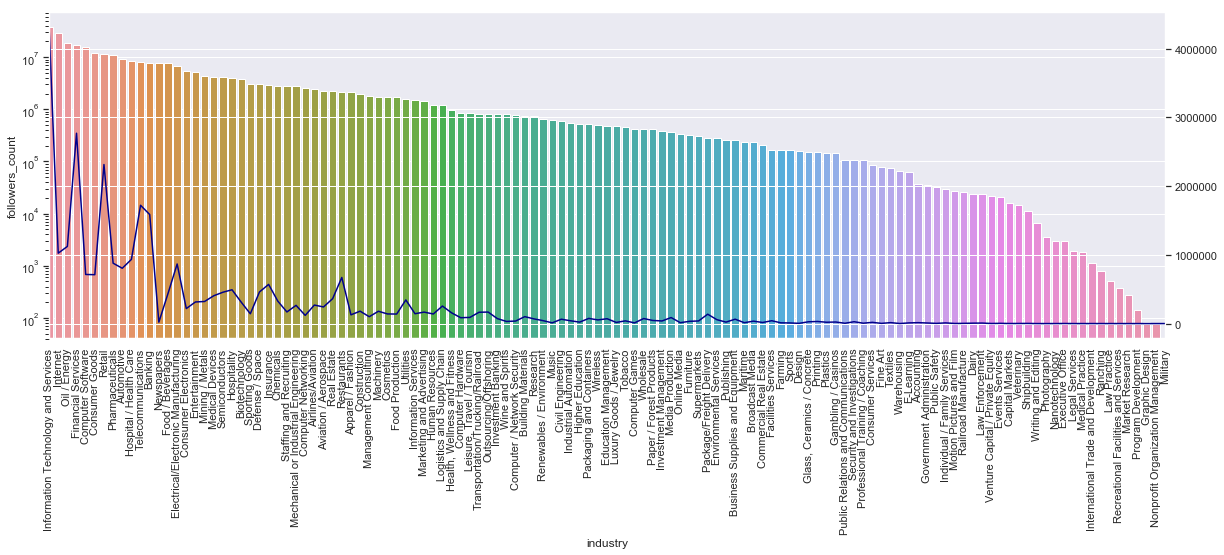

In [49]:
# fig, ax = plt.subplots(figsize=(10,6))
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.barplot(x='industry', y='followers_count', data=grouped2)
ax2 = ax.twinx()
grouped2.plot(x="industry", y="employees_on_platform", ax=ax2, legend=False, color="darkblue")
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(yscale="log")
fig =  ax.get_figure()
fig.savefig("../result/bar_followers_line_employees.png", transparent=True, dpi=300, bbox_inches='tight')